In [32]:
import os
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz 
import matplotlib.pyplot as plt
from IPython.display import Image

In [17]:
data = pd.read_csv("data/winequality.csv")
print(data.shape)
X = data.iloc[:,:11]
y = data.iloc[:,11]
train_X,test_X,train_y,test_y = train_test_split(X, y, random_state=0, test_size=0.1)
features = list(train_X.columns.values)


(3918, 13)


In [18]:
accuracy = dict()
best_tree = None
best_info = (0,0,None)
for d in range(1,50):
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=d)
    clf_gini.fit(train_X,train_y)
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state =0,
                               max_depth=d)
    clf_entropy.fit(train_X,train_y)
    gini_predict = clf_gini.predict(test_X)
    entropy_predict = clf_entropy.predict(test_X)
    g_accuracy = np.sum(gini_predict == test_y) / test_y.shape[0]
    e_accuracy = np.sum(entropy_predict == test_y) / test_y.shape[0]
    accuracy[d] = (g_accuracy,e_accuracy)
    best_temp = (0,None)
    if g_accuracy > e_accuracy:
        best_temp = (g_accuracy,'gini')
    else:
        best_temp = (e_accuracy,'entropy')
    if best_temp[0] > best_info[0]:
        best_info = (best_temp[0],d,best_temp[1])

In [19]:
list_g = list()
list_e = list()
for k,v in accuracy.items():
    print("depth: ",k,", entropy accuracy: ",v[1],", gini accuracy: ",v[0])
    list_g.append(v[0])
    list_e.append(v[1])

print ("best tree: depth: ",best_info[1],", split function: ",best_info[2],", accuracy: ",best_info[0])

depth:  1 , entropy accuracy:  0.459183673469 , gini accuracy:  0.459183673469
depth:  2 , entropy accuracy:  0.507653061224 , gini accuracy:  0.522959183673
depth:  3 , entropy accuracy:  0.510204081633 , gini accuracy:  0.515306122449
depth:  4 , entropy accuracy:  0.551020408163 , gini accuracy:  0.515306122449
depth:  5 , entropy accuracy:  0.545918367347 , gini accuracy:  0.545918367347
depth:  6 , entropy accuracy:  0.553571428571 , gini accuracy:  0.548469387755
depth:  7 , entropy accuracy:  0.530612244898 , gini accuracy:  0.538265306122
depth:  8 , entropy accuracy:  0.543367346939 , gini accuracy:  0.553571428571
depth:  9 , entropy accuracy:  0.545918367347 , gini accuracy:  0.56887755102
depth:  10 , entropy accuracy:  0.530612244898 , gini accuracy:  0.561224489796
depth:  11 , entropy accuracy:  0.530612244898 , gini accuracy:  0.571428571429
depth:  12 , entropy accuracy:  0.538265306122 , gini accuracy:  0.545918367347
depth:  13 , entropy accuracy:  0.530612244898 , g

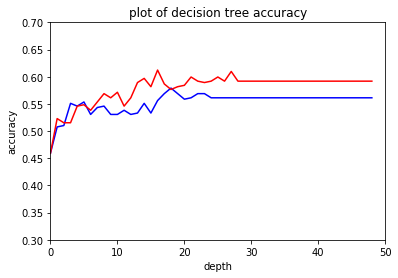

In [20]:
plt.plot(range(len(list_e)),list_e,'b-')
plt.plot(range(len(list_g)),list_g,'r-')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('plot of decision tree accuracy')
plt.axis([0, 50, 0.3, 0.7])
plt.show()

In [26]:
clf = DecisionTreeClassifier(criterion = best_info[2], random_state = 0,
                               max_depth=4)
clf.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

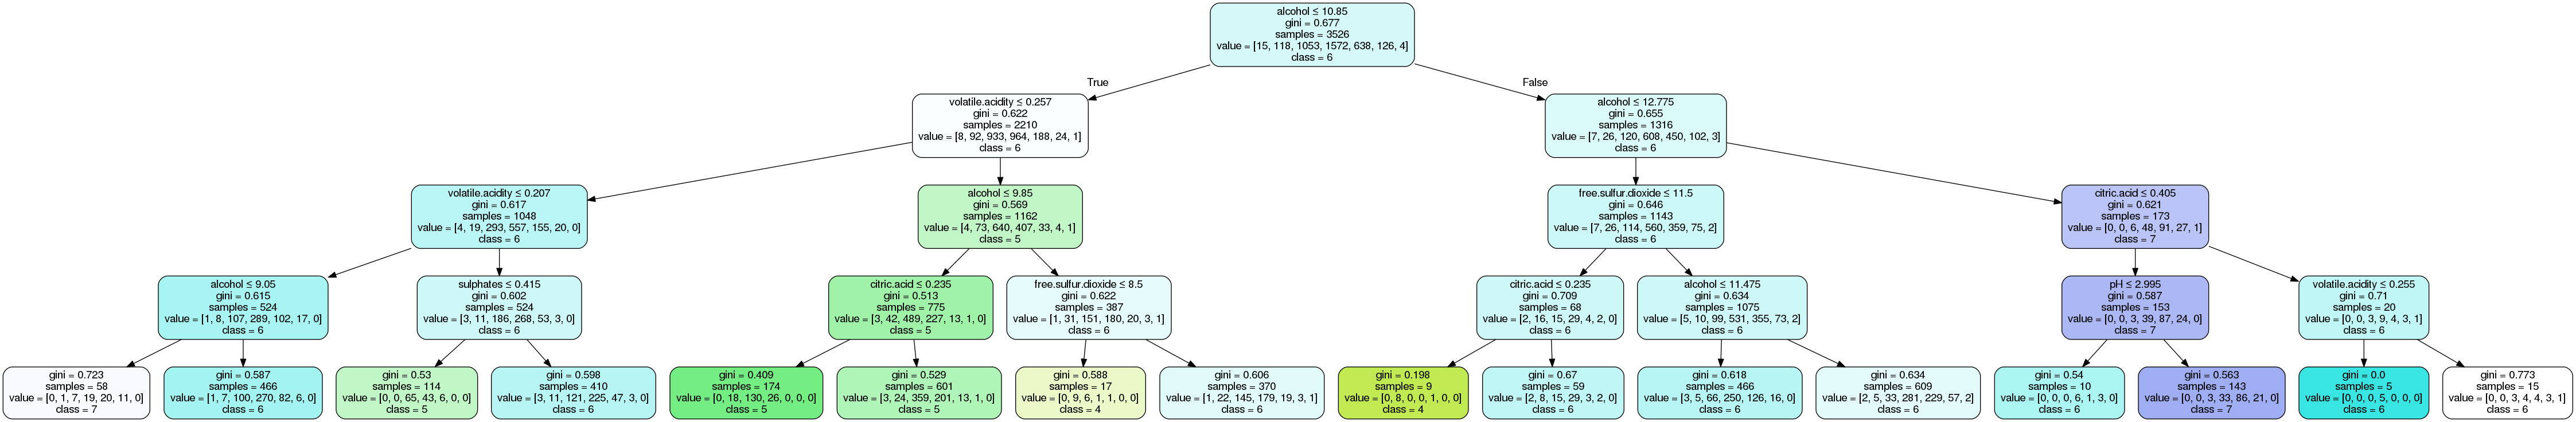

In [33]:
tree.export_graphviz(clf, out_file='tree.dot', 
                        feature_names=features,  
                         class_names=list(map(str, set(y))),  
                         filled=True, rounded=True,  
                         special_characters=True) 
os.system("dot -Tpng tree.dot -o tree.png")
os.system("tree.png")
Image(filename='tree.png')

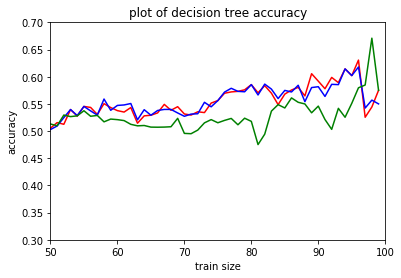

In [42]:
deep_grow_accuracy = list()
middle_grow_accuracy = list()
small_grow_accuracy = list()
for p in range(50,100):
    train_X,test_X,train_y,test_y = train_test_split(X, y, random_state=0, test_size= 1-p/100)
    
    deep_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=35)
    deep_clf_gini.fit(train_X,train_y)
    deep_gini_predict = deep_clf_gini.predict(test_X)
    deep_g_accuracy = np.sum(deep_gini_predict == test_y) / test_y.shape[0]
    deep_grow_accuracy.append(deep_g_accuracy)
    
   
    middle_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=20)
    middle_clf_gini.fit(train_X,train_y)
    middle_gini_predict = middle_clf_gini.predict(test_X)
    middle_g_accuracy = np.sum(middle_gini_predict == test_y) / test_y.shape[0]
    middle_grow_accuracy.append(middle_g_accuracy)
    

    small_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,
                               max_depth=5)
    small_clf_gini.fit(train_X,train_y)
    small_gini_predict = small_clf_gini.predict(test_X)
    small_g_accuracy = np.sum(small_gini_predict == test_y) / test_y.shape[0]
    small_grow_accuracy.append(small_g_accuracy)

plt.plot(range(50,100),deep_grow_accuracy,'r-')
plt.plot(range(50,100),middle_grow_accuracy,'b-')
plt.plot(range(50,100),small_grow_accuracy,'g-')
plt.xlabel('train size')
plt.ylabel('accuracy')
plt.title('plot of decision tree accuracy')
plt.axis([50,100,0.3, 0.7])
plt.show()